# Drawing the shots on our playing field

In [2]:

#ID for Spain vs USA Women World Cup
match_id_required = 69161
home_team_required ="Spain Women's"
away_team_required ="United States Women's"


In [4]:
file_name=str(match_id_required)+'.json'


In [6]:
#Load in all match events 
import json
with open('Datos_futbol/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)



In [8]:
data

[{'id': '413582c3-a655-4821-968f-6bdf53906d16',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 863, 'name': "Spain Women's"},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 863, 'name': "Spain Women's"},
  'duration': 0.0,
  'tactics': {'formation': 433,
   'lineup': [{'player': {'id': 10142, 'name': 'Sandra Paños García-Villamil'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 13},
    {'player': {'id': 10200, 'name': 'Marta Corredera Rueda'},
     'position': {'id': 2, 'name': 'Right Back'},
     'jersey_number': 7},
    {'player': {'id': 10165, 'name': 'Irene Paredes Hernandez'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 4},
    {'player': {'id': 10155, 'name': 'María Pilar León Cebrián'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number':

In [14]:
#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])



In [16]:
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,injury_stoppage_in_chain,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,50_50_outcome_id,50_50_outcome_name,match_id
0,413582c3-a655-4821-968f-6bdf53906d16,1,1,00:00:00.000,0,0,1,0.0000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
1,bd1acd1d-62c5-4f5b-b589-1414f88804cc,2,1,00:00:00.000,0,0,1,0.0000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
2,4205c4b8-d57f-47a7-9e42-6c148dafdb06,3,1,00:00:00.000,0,0,1,0.0000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
3,6223be74-60bb-4248-b1d1-02ecf9ce337e,4,1,00:00:00.000,0,0,1,0.0000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
4,6c519b96-4646-47ca-adcf-2385bddd79da,5,1,00:00:00.689,0,0,2,1.8506,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,f3db87d6-019f-4d4a-b5b9-2317eb84dbce,3051,2,00:53:03.907,98,3,177,1.8614,43,Carry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
3051,ee08692e-d9a9-446c-b345-65bb2902ebc9,3052,2,00:53:05.769,98,5,177,2.2308,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
3052,4341dd04-2e65-471e-8d26-d8ed2fa51f91,3053,2,00:53:08.000,98,8,177,0.0000,2,Ball Recovery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
3053,b9aea0e5-8af1-46af-b4ba-558514cb2bb9,3054,2,00:53:10.262,98,10,177,0.0000,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161


In [18]:
set(df['type_name'])

{'50/50',
 'Ball Receipt*',
 'Ball Recovery',
 'Block',
 'Carry',
 'Clearance',
 'Dispossessed',
 'Dribble',
 'Dribbled Past',
 'Duel',
 'Error',
 'Foul Committed',
 'Foul Won',
 'Goal Keeper',
 'Half End',
 'Half Start',
 'Injury Stoppage',
 'Interception',
 'Miscontrol',
 'Pass',
 'Player Off',
 'Player On',
 'Pressure',
 'Referee Ball-Drop',
 'Shield',
 'Shot',
 'Starting XI',
 'Substitution',
 'Tactical Shift'}

In [20]:
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [16]:
shots

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,injury_stoppage_in_chain,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,50_50_outcome_id,50_50_outcome_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
5cb5dc0c-d2ff-481e-b387-ad081ba389e1,34,1,00:00:51.681,0,51,5,0.427600,16,Shot,863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
0e5b3c7d-e58c-46b1-82c4-a4f5c43d98fe,199,1,00:06:06.236,6,6,12,0.496300,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
d6381cbb-e5aa-4652-80d8-3b9d57d5d4e4,295,1,00:08:54.261,8,54,19,1.359400,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
6c0c712b-ed13-45cc-a0d0-dce1f4c58539,346,1,00:12:48.506,12,48,24,0.374300,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
8e853d86-91d8-4283-b9cf-f3f0fe03fa02,350,1,00:13:19.559,13,19,25,0.341200,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
0b4785b5-1ebc-4b9c-9026-8902be38a12e,459,1,00:16:46.329,16,46,32,0.163800,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
9ed0871f-5fdb-4f0d-88b9-84d026ac7b93,775,1,00:24:54.778,24,54,50,0.442100,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
41a10cad-d3af-43b6-b0ce-ff5937572b5b,1156,1,00:34:27.249,34,27,72,1.028601,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
76a87576-85d8-448f-9a2b-4a1d6f5f47bb,1177,1,00:35:10.554,35,10,74,1.428799,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161


In [22]:
set(shots['shot_outcome_name'])

{'Blocked', 'Goal', 'Off T', 'Saved Off Target'}

In [24]:
goles = shots[shots['shot_outcome_name']=='Goal']
goles

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,injury_stoppage_in_chain,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,50_50_outcome_id,50_50_outcome_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
0e5b3c7d-e58c-46b1-82c4-a4f5c43d98fe,199,1,00:06:06.236,6,6,12,0.4963,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
d6381cbb-e5aa-4652-80d8-3b9d57d5d4e4,295,1,00:08:54.261,8,54,19,1.3594,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
a5a87567-a946-4860-9f5f-75436339c59d,2433,2,00:30:36.196,75,36,138,0.4589,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161


In [26]:
goles

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,injury_stoppage_in_chain,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,50_50_outcome_id,50_50_outcome_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
0e5b3c7d-e58c-46b1-82c4-a4f5c43d98fe,199,1,00:06:06.236,6,6,12,0.4963,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
d6381cbb-e5aa-4652-80d8-3b9d57d5d4e4,295,1,00:08:54.261,8,54,19,1.3594,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
a5a87567-a946-4860-9f5f-75436339c59d,2433,2,00:30:36.196,75,36,138,0.4589,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161


In [28]:
def DibujaCampo(length,width,linecolor):
    """Función para dibujar un campo de futbol en yards, adaptación del código de davsu428"""
    #Create figure
    fig=plt.figure()
            
    ax=fig.add_subplot(1,1,1)
           
    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=linecolor)
    plt.plot([0,length],[width,width], color=linecolor)
    plt.plot([length,length],[width,0], color=linecolor)
    plt.plot([length,0],[0,0], color=linecolor)
    plt.plot([length/2,length/2],[0,width], color=linecolor)
            
    #Left Penalty Area
    plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
    plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
    plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
    #Right Penalty Area
    plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
    plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
    plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
    #Left 6-yard Box
    plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
    plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
    plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
    #Right 6-yard Box
    plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
    plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
    plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
    #Prepare Circles; 10 yards distance. penalty on 12 yards
    centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
    centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
    leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
    rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
            
    #Prepare Arcs
    leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
    rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

In [30]:
#Function to draw the pitch
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np


#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80
circleSize=2



In [32]:
shots

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,injury_stoppage_in_chain,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,50_50_outcome_id,50_50_outcome_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
5cb5dc0c-d2ff-481e-b387-ad081ba389e1,34,1,00:00:51.681,0,51,5,0.427600,16,Shot,863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
0e5b3c7d-e58c-46b1-82c4-a4f5c43d98fe,199,1,00:06:06.236,6,6,12,0.496300,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
d6381cbb-e5aa-4652-80d8-3b9d57d5d4e4,295,1,00:08:54.261,8,54,19,1.359400,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
6c0c712b-ed13-45cc-a0d0-dce1f4c58539,346,1,00:12:48.506,12,48,24,0.374300,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
8e853d86-91d8-4283-b9cf-f3f0fe03fa02,350,1,00:13:19.559,13,19,25,0.341200,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
0b4785b5-1ebc-4b9c-9026-8902be38a12e,459,1,00:16:46.329,16,46,32,0.163800,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
9ed0871f-5fdb-4f0d-88b9-84d026ac7b93,775,1,00:24:54.778,24,54,50,0.442100,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
41a10cad-d3af-43b6-b0ce-ff5937572b5b,1156,1,00:34:27.249,34,27,72,1.028601,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161
76a87576-85d8-448f-9a2b-4a1d6f5f47bb,1177,1,00:35:10.554,35,10,74,1.428799,16,Shot,1214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69161


In [34]:
for i,shot in shots.iterrows():
    print(i, shot.location)

5cb5dc0c-d2ff-481e-b387-ad081ba389e1 [102.8, 30.1]
0e5b3c7d-e58c-46b1-82c4-a4f5c43d98fe [108.1, 40.1]
d6381cbb-e5aa-4652-80d8-3b9d57d5d4e4 [97.1, 39.7]
6c0c712b-ed13-45cc-a0d0-dce1f4c58539 [113.6, 30.0]
8e853d86-91d8-4283-b9cf-f3f0fe03fa02 [118.3, 31.2]
0b4785b5-1ebc-4b9c-9026-8902be38a12e [114.7, 42.1]
9ed0871f-5fdb-4f0d-88b9-84d026ac7b93 [108.7, 40.0]
41a10cad-d3af-43b6-b0ce-ff5937572b5b [94.0, 28.4]
76a87576-85d8-448f-9a2b-4a1d6f5f47bb [89.5, 40.9]
0458b135-c2f2-4ae5-813e-e182023add16 [100.3, 52.5]
3e767b66-7e5a-428e-a4a8-26af57a7639b [96.3, 36.2]
97ea84d3-d429-48a4-9664-a2c2d489da12 [98.5, 24.3]
746bc451-30af-477a-b824-293543017741 [102.9, 54.6]
a5a87567-a946-4860-9f5f-75436339c59d [108.0, 40.0]
b770310f-94c0-4397-ae2e-98d4ce86ace2 [109.9, 18.3]


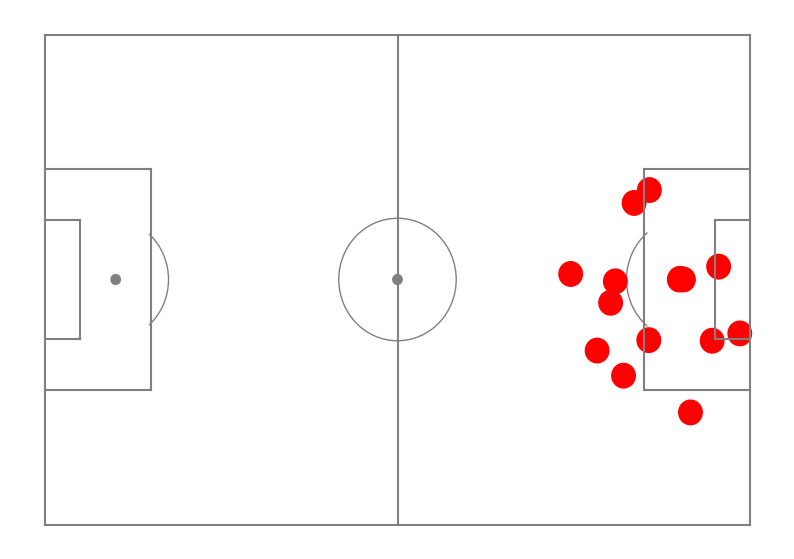

In [36]:

(fig,ax) = DibujaCampo(pitchLengthX,pitchWidthY,'gray')

for i,shot in shots.iterrows():
    
    x=shot['location'][0]
    y=shot['location'][1]
    shotCircle=plt.Circle((x,y),2,color="red")
    ax.add_patch(shotCircle)
    
fig.set_size_inches(10, 7)
plt.show()
    

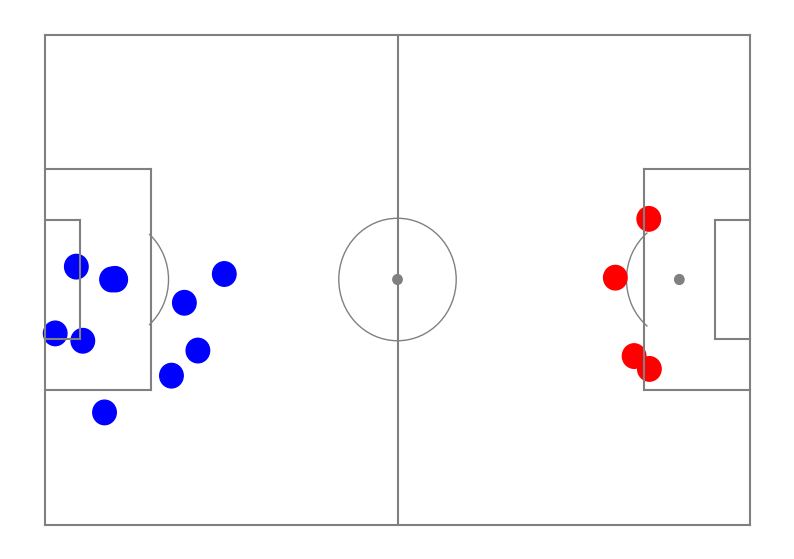

In [38]:
(fig,ax) = DibujaCampo(pitchLengthX,pitchWidthY,'gray')

for i,shot in shots.iterrows():
    
    x=shot['location'][0]
    y=shot['location'][1]
    team_name=shot['team_name']
    
    if team_name == home_team_required:
    
        shotCircle=plt.Circle((x,pitchWidthY-y),2,color="red")
        ax.add_patch(shotCircle)
        
    else:
        shotCircle=plt.Circle((pitchLengthX-x,y),2,color="blue")
        ax.add_patch(shotCircle)
        
    
fig.set_size_inches(10, 7)
plt.show()
    

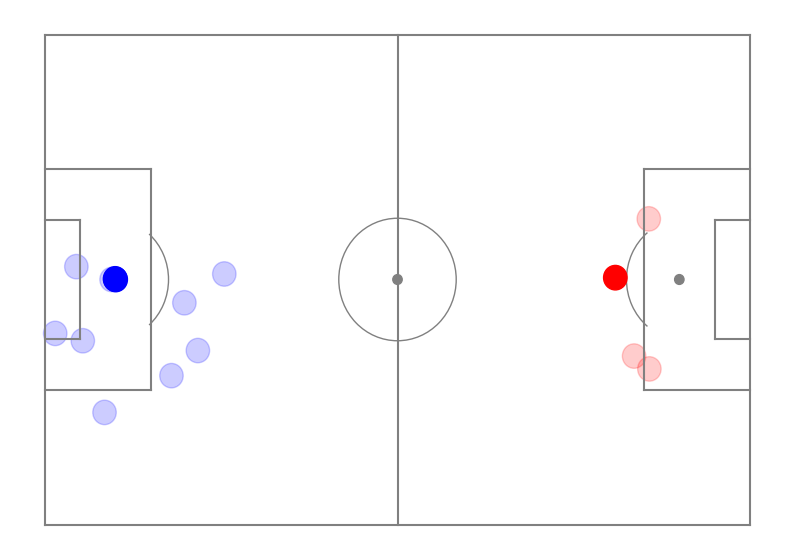

In [40]:
(fig,ax) = DibujaCampo(pitchLengthX,pitchWidthY,'gray')

for i,shot in shots.iterrows():
    
    x=shot['location'][0]
    y=shot['location'][1]
    team_name=shot['team_name']
    goal=shot['shot_outcome_name']=='Goal'
    
    if team_name == home_team_required:
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),2,color="red")
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
        
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),2,color="blue")
            
            
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),2,color="blue")
            shotCircle.set_alpha(.2)
            
    ax.add_patch(shotCircle)
        
    
fig.set_size_inches(10, 7)
plt.show()

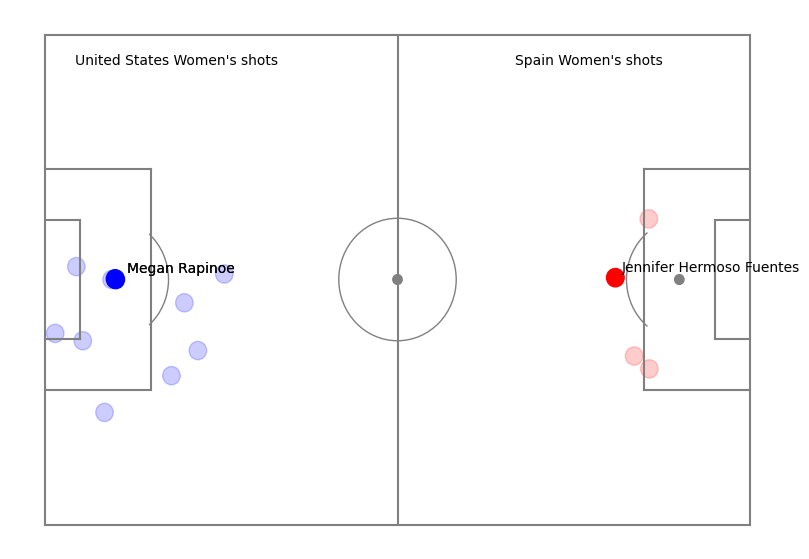

In [42]:
(fig,ax) = DibujaCampo(pitchLengthX,pitchWidthY,'gray')
#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    #print(goal)
    team_name=shot['team_name']
    
    circleSize=1.5
    
    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+2),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
fig.savefig('shots.pdf', dpi=100) 
plt.show()

